## Data processing and plotting for figure04

This notebook shows how we obtained the data for figure04 of the paper titled:

$\textit{A facility for cryogenic ion irradiation and in operando characterization of Rare-Earth Barium Copper Oxide superconducting tapes}$ by A.R Devitre, D.X. Fischer, K.B. Woller, B.C. Clark, M.P. Short, D.G. Whyte, and Z.S. Hartwig, published by the Review of Scientific Instruments. 

In particular, the notebook follows the treatment of our data treatment from raw data files (provided in ~/data/figure04/) to the production figure. This figure can be regenerated, modified, exported and used according to the license of the repository.

In [3]:
%matplotlib widget

import numpy as np, matplotlib.pyplot as plt, pandas as pd
import os, sys

from scipy.optimize import curve_fit

sys.path.append('../../')
sys.path.append('/Users/alexisdevitre/Documents/code/hts-irradiation')
import hts_fitting as hts
import default_style

def polynomial(x, a, b, c, d):
    return a*x**3+b*x**2+c*x**1+d

# Change this to match the destination folder with data for figure04
parentDirectory = 'data/'
outputDirectory = 'raw/'

# Change this if you want labels on the figure axes
forPaper = False



In [30]:
stats.temperature['mean']

temperature_group
[19.9, 20.1)    20.037448
[29.9, 30.1)    29.991479
[39.9, 40.1)    39.945758
[49.9, 50.1)    50.023482
[63.7, 63.9)    63.768884
Name: mean, dtype: float64

<>:8: SyntaxWarning: invalid escape sequence '\m'
<>:8: SyntaxWarning: invalid escape sequence '\m'
/var/folders/jl/4_5mv35x3wb9cccz5qcc6vmc0000gn/T/ipykernel_45422/3782268452.py:8: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel('$\mathrm{I_c \, / \, I_c (20 \, K)}$')
/Users/alexisdevitre/Documents/code/hts-irradiation/hts_fitting.py:317: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(ff.linear, ccut, vcut)
/var/folders/jl/4_5mv35x3wb9cccz5qcc6vmc0000gn/T/ipykernel_45422/3782268452.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats = data.drop(columns=['n', 'timeends', 'fpath']).groupby('temperature_group').agg(['mean', 'std']).dropna()
/var/folders/jl/4_5mv35x3wb9cccz5qcc6vmc0000gn/T/ipykernel_45422/3782268452.py:14: FutureWarnin

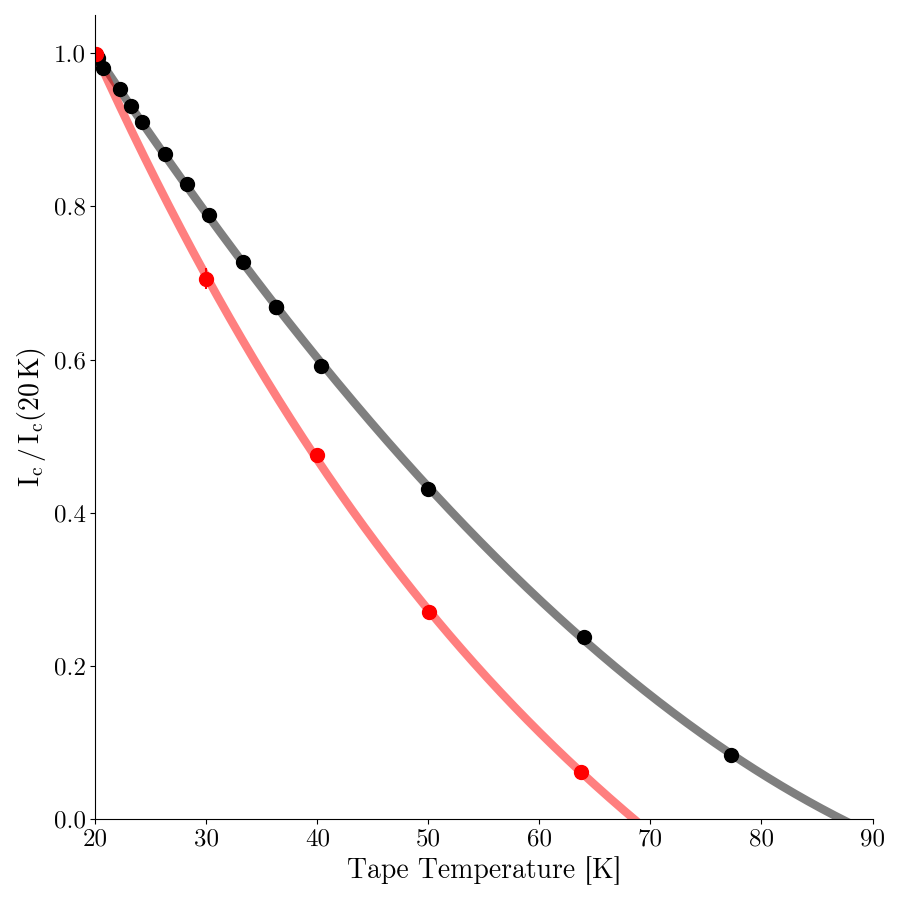

In [86]:
fpaths_unirradiated = [parentDirectory+'unirradiated/'+f for f in np.sort(os.listdir(parentDirectory+'unirradiated/')) if f[-4:] == '.txt']
fpaths_irradiated = [parentDirectory+'irradiated/'+f for f in np.sort(os.listdir(parentDirectory+'irradiated/')) if f[-4:] == '.txt']

fig, ax = plt.subplots()
ax.set_xlim(20, 90)
ax.set_ylim(0, 1.05)
ax.set_xlabel('Tape Temperature [K]')
ax.set_ylabel('$\mathrm{I_c \, / \, I_c (20 \, K)}$')

xsmooth = np.arange(20, 90, 0.1)

for fpaths, c in zip([fpaths_unirradiated, fpaths_irradiated], ['k', 'r']):
    _, _, data, _, _ = hts.getIcT(fpaths)
    stats = data.drop(columns=['n', 'timeends', 'fpath']).groupby('temperature_group').agg(['mean', 'std']).dropna()  
    x, xerr, y, yerr = stats.temperature['mean'], stats.temperature['std'], stats.ic['mean'], stats.ic['std']

    popt, pcov = curve_fit(polynomial, x, y)
    ysmooth = polynomial(xsmooth, *popt)
    y0 = ysmooth[xsmooth == 20]
    
    ax.plot(xsmooth, ysmooth/y0, linewidth=6, alpha=.5, color=c)
    ax.errorbar(x=x, xerr=xerr, y=y/y0, yerr=yerr/y0, marker='o', linestyle='None', color=c)

fig.tight_layout()
fig.savefig(outputDirectory+'IcT.png', transparent=True, dpi=300)

<>:5: SyntaxWarning: invalid escape sequence '\m'
<>:5: SyntaxWarning: invalid escape sequence '\m'
/var/folders/jl/4_5mv35x3wb9cccz5qcc6vmc0000gn/T/ipykernel_45422/2266397466.py:5: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel('$\mathrm{I_c \, / \, I_c (20 \, K)}$', fontsize=32)
/Users/alexisdevitre/Documents/code/hts-irradiation/hts_fitting.py:317: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(ff.linear, ccut, vcut)
/var/folders/jl/4_5mv35x3wb9cccz5qcc6vmc0000gn/T/ipykernel_45422/2266397466.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats = data.drop(columns=['n', 'timeends', 'fpath']).groupby('temperature_group').agg(['mean', 'std']).dropna()
/var/folders/jl/4_5mv35x3wb9cccz5qcc6vmc0000gn/T/ipykernel_45422/2266397466.py:11:

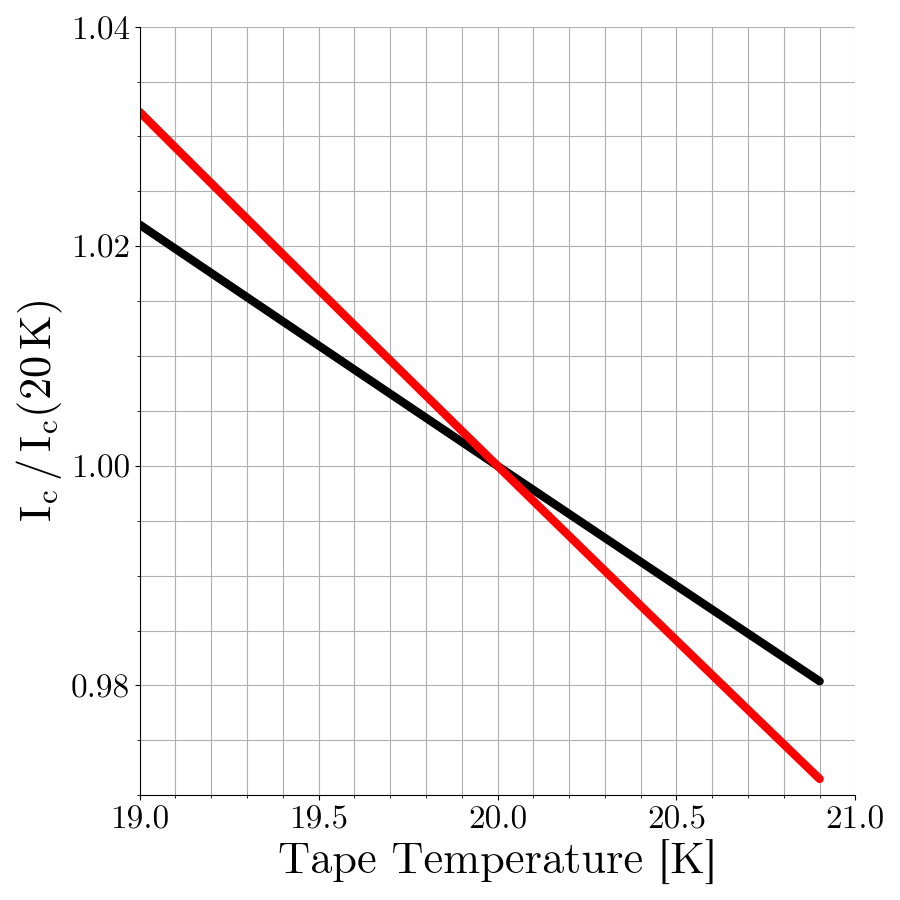

In [84]:
fig, ax = plt.subplots()
ax.set_xlim(19, 21)
ax.set_ylim(0.97, 1.04)
ax.set_xlabel('Tape Temperature [K]', fontsize=32)
ax.set_ylabel('$\mathrm{I_c \, / \, I_c (20 \, K)}$', fontsize=32)

xsmooth = np.arange(19, 21, 0.1)

for fpaths, c in zip([fpaths_unirradiated, fpaths_irradiated], ['k', 'r']):
    _, _, data, _, _ = hts.getIcT(fpaths)
    stats = data.drop(columns=['n', 'timeends', 'fpath']).groupby('temperature_group').agg(['mean', 'std']).dropna()  
    x, xerr, y, yerr = stats.temperature['mean'], stats.temperature['std'], stats.ic['mean'], stats.ic['std']

    popt, pcov = curve_fit(polynomial, x, y)
    ysmooth = polynomial(xsmooth, *popt)
    y0 = ysmooth[np.argmin(np.abs(xsmooth-20))]
    
    ax.plot(xsmooth, ysmooth/y0, linewidth=6, color=c)

ax.minorticks_on()
ax.grid(which='both')
ax.set_xticks([19, 19.5, 20, 20.5, 21])
ax.set_yticks([0.98, 1.00, 1.02, 1.04])

ax.tick_params(axis="both", labelsize=24)
fig.tight_layout()
fig.savefig(outputDirectory+'IcT-inset.png', transparent=True, dpi=300)